In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
from pathlib import Path
import os

In [2]:
def delete_multiple_lines(original_file, line_numbers):
    """In a file, delete the lines at line number in given list"""
    is_skipped = False
    counter = 0
    # Create name of dummy / temporary file
    dummy_file = original_file + '.bak'
    # Open original file in read only mode and dummy file in write mode
    with open(original_file, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        # Line by line copy data from original file to dummy file
        for line in read_obj:
            # If current line number exist in list then skip copying that line
            if counter not in line_numbers:
                write_obj.write(line)
            else:
                is_skipped = True
            counter += 1
    # If any line is skipped then rename dummy file as original file
    if is_skipped:
        os.remove(original_file)
        os.rename(dummy_file, original_file)
    else:
        os.remove(dummy_file)

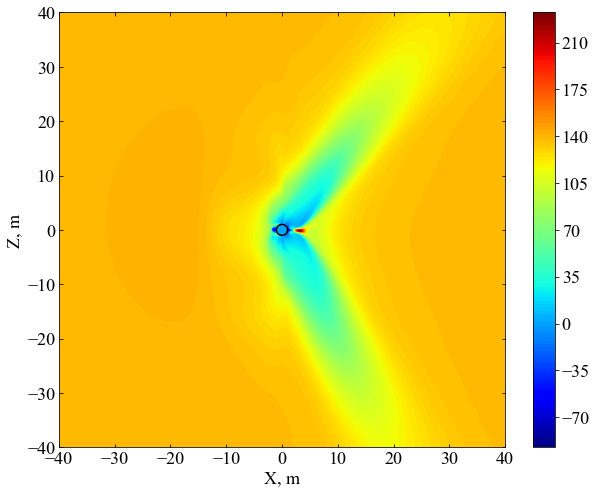

In [8]:
# copy files from 'home/SWMF/SWMF_20200804/GM/BATSRUS/run_test_dir/IO2/' to
#                 'home/Dropbox/Codes/magsail/data/

src_root = '../../../SWMF/SWMF_20200804/GM/BATSRUS/run_test31/IO2/'
des_root = '../../../Dropbox/Codes/magsail/data/'

file_names =['y=0_mhd_2_n00000500_1_pe0000.tec', 
             'y=0_mhd_2_n00000500_1_pe0001.tec', 
             'y=0_mhd_2_n00000500_1_pe0002.tec', 
             'y=0_mhd_2_n00000500_1_pe0003.tec']

out_file_1 = 'output_file_0500.tec'

for file_name in file_names:
    shutil.copy(src_root+file_name, des_root+file_name)
    
filenames = ['data/' + s for s in file_names]

# combine multiple output files into a single out file
with open('data/'+out_file_1, 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

# delete the header lines from the out file
delete_multiple_lines('data/'+out_file_1, np.arange(0,23))

data = np.loadtxt('data/'+out_file_1)

X = data[:,0]
Y = data[:,1]
Z = data[:,2]

P = data[:,4]

from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


xgrid = np.linspace(X.min(), X.max(), 801)
ygrid = np.linspace(Z.min(), Z.max(), 801)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata((X,Z),P, (xgrid, ygrid),method='cubic')

fig, ax = plt.subplots()
fig.set_size_inches([10,8])

cs=ax.tricontourf(X, Z, P, 150, cmap=plt.cm.jet) 
cbar =fig.colorbar(cs)

cbar.ax.tick_params(labelsize=18) 
plt.xlim([-40.0,40.0])
plt.ylim([-40.0,40.0])

theta_arr = np.linspace(0,2*np.pi,101)
x_arr = 1.0*np.cos(theta_arr)
y_arr = 1.0*np.sin(theta_arr)

plt.plot(x_arr, y_arr, 'k-')

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=18)
plt.tick_params(axis='y',labelsize=18)

plt.xlabel('X, m', fontsize=18)
plt.ylabel('Z, m', fontsize=18)

#plt.savefig('plots/pp_BATSRUS_output-y=0_cut- g=10,8,8, iter=1000, eta=0.0, Bz = 25000, P=24.png',bbox_inches='tight')
#plt.savefig('plots/pp_BATSRUS_output-y=0_cut- g=10,8,8, iter=1000, eta=0.0, Bz = 25000, P=24.pdf', dpi=300,bbox_inches='tight')
#plt.savefig('plots/pp_BATSRUS_output-y=0_cut- g=10,8,8, iter=1000, eta=0.0, Bz = 25000, P=24.eps', dpi=300,bbox_inches='tight')

plt.show()